## data prices regions - train multiple linear regression model. One for each region

Content:
- data: containt the data basic features (units_solds, peak) but in addition the feature prices is added with the prices of all regions. Also the data is splitted to train different models for each region
  
- Model: artifact that contain the model and the feature engineering (previosly a feature engineering was done, but for example objetive, in this part a do more feature engineering and "compile" it with the model). It is mandatory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 0. Root repo

In [2]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\Examples-Gurobi-ML


### 1. Read data

In [3]:
path_data_prices_regions = 'artifacts/data/data_prices_regions.pkl'

data = pd.read_pickle(path_data_prices_regions)

data.head()

,units_sold,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,,
2015-01-04,3.382800,Great_Lakes,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,2.578275,Midsouth,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,5.794411,West,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,3.204112,Southeast,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,0.321824,Northern_New_England,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89


### 2. Generate X, y, list features, list segmentation data

In [4]:
""" Create list regions """
list_regions = data['region'].unique().tolist()
list_regions.sort()
list_regions

['Great_Lakes',
 'Midsouth',
 'Northeast',
 'Northern_New_England',
 'Plains',
 'SouthCentral',
 'Southeast',
 'West']

In [5]:
""" Define features and target """
# target
target = 'units_sold'
list_target = [target]

# list features - all variables in dataframe that are not target
list_features = list(set(data.columns.tolist()) - set([target]))


######  set manually list features
list_columns_prices_regions = ['price_' + name_region for name_region in list_regions] # generate a list of all the columns of prices (prices for each region)
list_columns_prices_regions = [column.lower() for column in list_columns_prices_regions]
list_features = ['region'] + ['peak'] + list_columns_prices_regions # list features hardcoded


print('list_features: ', list_features)
print('list_target: ', list_target)

list_features:  ['region', 'peak', 'price_great_lakes', 'price_midsouth', 'price_northeast', 'price_northern_new_england', 'price_plains', 'price_southcentral', 'price_southeast', 'price_west']
list_target:  ['units_sold']


In [6]:
""" create data X - features // y - target """
data_X = data[list_features]
data_y = data[list_target]

In [7]:
data_X.head()

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2015-01-04,Great_Lakes,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Midsouth,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,West,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Southeast,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Northern_New_England,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89


In [8]:
data_y.head()

,units_sold
date,
2015-01-04,3.382800
2015-01-04,2.578275
2015-01-04,5.794411
2015-01-04,3.204112
2015-01-04,0.321824


### 3. Split - train - test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X, 
                                                    data_y, 
                                                    train_size = 0.7, 
                                                    random_state = 42
                                                   )

In [10]:
print('shapes')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shapes
X_train:  (2116, 10)
y_train:  (2116, 1)
X_test:  (908, 10)
y_test:  (908, 1)


In [11]:
X_train.head(2)

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2016-06-05,Plains,1,1.010000,1.140000,1.350000,1.180000,0.93000,0.83000,0.910000,0.820000
2019-08-18,West,0,1.363272,1.428336,1.521049,1.549343,1.42877,1.20756,1.214219,1.365767


In [12]:
y_train.head(2)

,units_sold
date,
2016-06-05,2.330438
2019-08-18,5.568754


In [13]:
X_test.head(2)

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2022-05-08,Southeast,1,1.309871,1.41175,1.61657,1.496001,1.472752,1.191777,1.471889,1.47211
2015-08-09,West,0,1.120000,1.15000,1.10000,1.030000,1.140000,0.890000,1.000000,1.01000


In [14]:
y_test.head(2)

,units_sold
date,
2022-05-08,4.477437
2015-08-09,5.531488


### 4. Processing data
- Region string. The model is divided into one model per region and delete this column before the training of the model (steps: divide data each region, delete region, train model), so it is not necessary this feature
- Peak ok - binary variable
- price normalize continuous variable

#### 4.1 Scaler Prices

In [15]:
# # instance of class scaler
# scaler_prices = StandardScaler()

# # fit_transform train
# X_train[list_columns_prices_regions] = scaler_prices.fit_transform(X_train[list_columns_prices_regions])

# # transfom test
# X_test[list_columns_prices_regions] = scaler_prices.fit_transform(X_test[list_columns_prices_regions])

In [16]:
# transformer data sklearn
feat_transform_multiple_lr = make_column_transformer(
    ("passthrough", ["peak"]),  # it is important the order in transformations to conserve the order in columns
    (StandardScaler(), list_columns_prices_regions),
    verbose_feature_names_out=False, # conserve original column names
    remainder='drop'
)

In [17]:
X_train.head(2)

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2016-06-05,Plains,1,1.010000,1.140000,1.350000,1.180000,0.93000,0.83000,0.910000,0.820000
2019-08-18,West,0,1.363272,1.428336,1.521049,1.549343,1.42877,1.20756,1.214219,1.365767


In [18]:
X_train.shape

(2116, 10)

In [19]:
# shape output
feat_transform_multiple_lr.fit_transform(X_train).shape

(2116, 9)

In [20]:
# example output
feat_transform_multiple_lr.fit_transform(X_train)[0, :]

array([ 1.        , -0.83471069, -0.33554031,  0.10552406, -0.369726  ,
       -1.18261794, -0.33284042, -1.14444793, -1.32109943])

### 5. Pipeline processing data + train model

In [21]:
#linear_reg_pipeline = make_pipeline(feat_transform_multiple_lr, LinearRegression())

### 6. Split data train&test by regions
Generate datasets train and test for each region to train differents models for each region' dataset

In [22]:
# generate a dictionaries to save "X_train", "y_train", "X_test", "y_test", "model" by each region
dic_X_train = {} 
dic_y_train = {} 
dic_X_test = {}
dic_y_test = {}
dic_lr_model = {}

In [23]:
# add column region in data "y" to filter data by region
y_train['region'] = X_train[['region']]
y_test['region'] = X_test[['region']]

for region_name in list_regions:
    #print(region_name)

    ##### TRAIN
    # generate X_train filtered by region
    X_train_filter_region = X_train[X_train['region'] == region_name]
    X_train_filter_region = X_train_filter_region.drop(columns = 'region')
    
    # generate y_train filtered by region
    y_train_filter_region = y_train[y_train['region'] == region_name]
    y_train_filter_region = y_train_filter_region.drop(columns = 'region')


    ##### TEST
    # generate X_test filtered by region
    X_test_filter_region = X_test[X_test['region'] == region_name]
    X_test_filter_region = X_test_filter_region.drop(columns = 'region')
    
    # generate y_test filtered by region
    y_test_filter_region = y_test[y_test['region'] == region_name]
    y_test_filter_region = y_test_filter_region.drop(columns = 'region')


    ##### MODEL
    #lr_model_filter_region = LinearRegression()
    lr_model_filter_region = make_pipeline(feat_transform_multiple_lr, LinearRegression())


    ##### SAVE IN DICCTIONARIES
    dic_X_train[region_name] = X_train_filter_region
    dic_y_train[region_name] = y_train_filter_region
    dic_X_test[region_name] = X_test_filter_region
    dic_y_test[region_name] = y_test_filter_region
    dic_lr_model[region_name] = lr_model_filter_region

In [24]:
# show example models
dic_lr_model

{'Great_Lakes': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                   ['peak']),
                                                  ('standardscaler',
                                                   StandardScaler(),
                                                   ['price_great_lakes',
                                                    'price_midsouth',
                                                    'price_northeast',
                                                    'price_northern_new_england',
                                                    'price_plains',
                                                    'price_southcentral',
                                                    'price_southeast',
                                                    'price_west'])],
                                    verbose_feature_names_out=False)),
                

In [25]:
# show example train dataset
region_example = list(dic_X_train.keys())[0]
dic_X_train[region_example]

,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,
2016-07-24,1,1.320000,1.320000,1.540000,1.360000,1.220000,0.970000,1.170000,1.080000
2019-04-28,1,1.530612,1.480033,1.603740,1.474515,1.466651,1.151307,1.403997,1.417190
2016-07-03,1,1.130000,1.150000,1.410000,1.290000,1.050000,0.910000,0.910000,0.970000
2017-05-21,1,1.340000,1.340000,1.660000,1.540000,1.330000,0.940000,1.380000,1.060000
2016-06-19,1,1.100000,1.160000,1.400000,1.260000,0.870000,0.890000,0.940000,0.860000
...,...,...,...,...,...,...,...,...,...
2018-07-29,1,1.130000,1.210000,1.160000,1.270000,1.160000,0.880000,1.200000,1.110000
2017-09-17,0,1.860000,1.550000,1.540000,1.590000,1.660000,1.270000,1.660000,1.530000
2021-03-07,1,0.952201,1.016598,1.109597,1.068349,0.955722,0.699884,0.947283,0.935992


### 7. Train model with all train dataset

In [26]:
for region_name in list_regions:
    print(f'trainning: {region_name}')
    dic_lr_model[region_name].fit(dic_X_train[region_name], dic_y_train[region_name])

trainning: Great_Lakes
trainning: Midsouth
trainning: Northeast
trainning: Northern_New_England
trainning: Plains
trainning: SouthCentral
trainning: Southeast
trainning: West


## 8. Evaluate Performance Model

## Performance all data
Evaluate performance of the model with all the train and test data

#### 8.0 Get y_train_pred , y_test_pred

#### 8.0.1 Get predictions of the data segmented by region. Each segmentation has it own model
Generate a dictionary where the values predicted for each region are saved

In [27]:
### generate dictionary to save y_pred
dic_y_train_pred = {}
dic_y_test_pred = {}

### save y_pred
for region_name in list_regions:
    
    y_train_pred = dic_lr_model[region_name].predict(dic_X_train[region_name])
    dic_y_train_pred[region_name] = pd.DataFrame(y_train_pred)

    y_test_pred = dic_lr_model[region_name].predict(dic_X_test[region_name])
    dic_y_test_pred[region_name] = pd.DataFrame(y_test_pred)

#### 8.0.2 Get predictions of all the data.
Join the data predicted (train and test) (true and predited) for each region into only one dataframe

In [28]:
###### generate a data of all regions append

# create dataframes placeholders
y_train_joined = pd.DataFrame()
y_test_joined = pd.DataFrame()
y_train_joined_pred = pd.DataFrame()
y_test_joined_pred = pd.DataFrame()


# generate y_train_joined, y_test_joined and the predicted values y_train_joined_pred, y_test_joined_pred
for region_name in list_regions:
    #print(region_name)

    # y_train
    y_train_joined = pd.concat([y_train_joined, dic_y_train[region_name]])

    # y_train_pred
    y_train_joined_pred = pd.concat([y_train_joined_pred, dic_y_train_pred[region_name]])


    # y_test
    y_test_joined = pd.concat([y_test_joined, dic_y_test[region_name]])

    # y_test_pred
    y_test_joined_pred = pd.concat([y_test_joined_pred, dic_y_test_pred[region_name]])

In [29]:
print('view shape')
print('y_train: ', y_train_joined.shape)
print('y_train_pred: ', y_train_joined_pred.shape)

print('y_test: ', y_test_joined.shape)
print('y_test_pred: ', y_test_joined_pred.shape)

view shape
y_train:  (2116, 1)
y_train_pred:  (2116, 1)
y_test:  (908, 1)
y_test_pred:  (908, 1)


#### 8.1. Evaluate performance model - metrics

In [30]:
def print_metrics_evaluation(y_train,  y_train_pred, y_test, y_test_pred):
    """
    Print metrics of supervised models. Train and Test metrics

    Args:
        y_train
        y_train_pred
        y_test
        y_test_pred
    """
    # evaluate model
    
    # r2
    r2_train = r2_score(y_train, y_train_pred).round(3)
    r2_test = r2_score(y_test, y_test_pred).round(3)
    
    print('\nR2')
    print('r2_train: ', r2_train)
    print('r2_test: ', r2_test)
    
    
    # mae
    mae_train = mean_absolute_error(y_train, y_train_pred).round(3)
    mae_test = mean_absolute_error(y_test, y_test_pred).round(3)
    
    print('\nMAE')
    print('mae_train: ', mae_train)
    print('mae_test: ', mae_test)
    
    # mse
    mse_train = mean_squared_error(y_train, y_train_pred, squared = True).round(3)
    mse_test= mean_squared_error(y_test, y_test_pred, squared = True).round(3)
    
    print('\nMSE')
    print('mse_train: ', mse_train)
    print('mse_test: ', mse_test)
    
    
    # rmse
    rmse_train = mean_squared_error(y_train, y_train_pred, squared = False).round(3)
    rmse_test= mean_squared_error(y_test, y_test_pred, squared = False).round(3)
    
    print('\nRMSE')
    print('rmse_train: ', rmse_train)
    print('rmse_test: ', rmse_test)

In [31]:
print_metrics_evaluation(y_train = y_train_joined, 
                         y_train_pred = y_train_joined_pred, 
                         y_test = y_test_joined, 
                         y_test_pred = y_test_joined_pred
                        )


R2
r2_train:  0.916
r2_test:  0.91

MAE
mae_train:  0.427
mae_test:  0.438

MSE
mse_train:  0.362
mse_test:  0.374

RMSE
rmse_train:  0.602
rmse_test:  0.611


#### 8.2 Evaluate performance model - y true vs y_predicted

In [32]:
def plot_y_true_vs_y_pred(df_y_true, df_y_pred, title_plot):
    """
    Plot y_true vs y_pred. Both in format dataframe
    """
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(df_y_true, df_y_pred, alpha=0.3, marker='x', label='y_true vs y_pred')

    # Add bisectriz
    x = np.linspace(df_y_true.min()[0], df_y_true.max()[0], df_y_true.shape[0])
    y = x  # Bisectriz: y = x
    ax.plot(x, y, label='Bisectriz', color='red', alpha=0.3)

    # Add names to axis
    ax.set_xlabel('Y true')
    ax.set_ylabel('Y pred')
    
    ax.set_title(title_plot)
    ax.legend()
    
    return fig

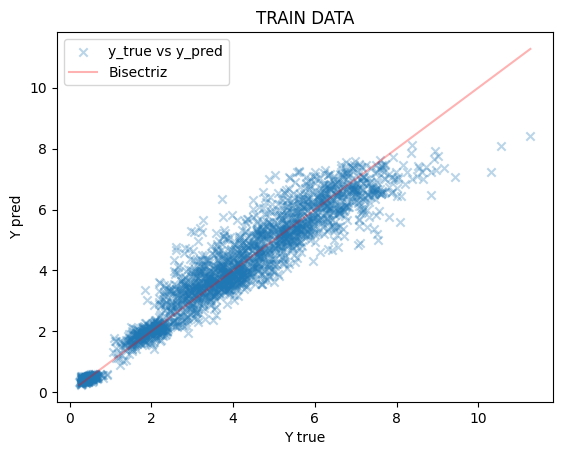

In [33]:
# plot TRAIN
plot_true_pred_train = plot_y_true_vs_y_pred(df_y_true = y_train_joined,
                                             df_y_pred = y_train_joined_pred,
                                             title_plot = 'TRAIN DATA'
                                            )

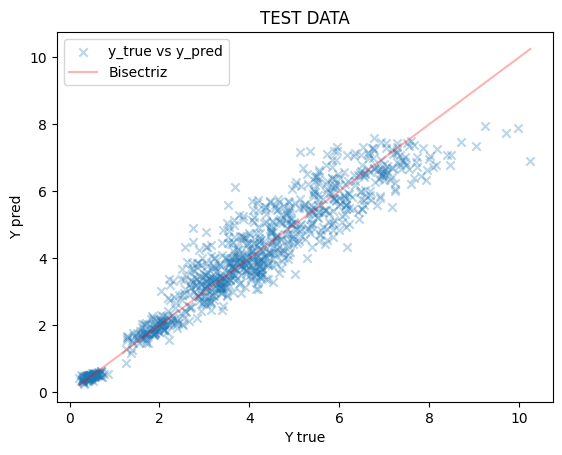

In [34]:
# plot TEST
plot_true_pred_test = plot_y_true_vs_y_pred(df_y_true = y_test_joined,
                                            df_y_pred = y_test_joined_pred,
                                            title_plot = 'TEST DATA'
                                           )

## -> Performance by region
Evaluate performance of the model with the data segmented. In this example, divide by region

#### 8.3 Evaluate performance model by region - metrics by region
In this example, each region has its own model. So, for each region the metrics are calculated and then show in one only dataframe

In [35]:
# r2
r2_train_list = []
r2_test_list = []
for region_name in list_regions:
    r2_train = r2_score(dic_y_train[region_name], dic_y_train_pred[region_name]).round(3)
    r2_test = r2_score(dic_y_test[region_name], dic_y_test_pred[region_name]).round(3)

    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

print('\nR2')
print('r2_train: ', r2_train_list)
print('r2_test: ', r2_test_list)


R2
r2_train:  [0.52, 0.538, 0.494, 0.385, 0.568, 0.534, 0.532, 0.493]
r2_test:  [0.566, 0.452, 0.378, 0.477, 0.551, 0.48, 0.495, 0.436]


In [36]:
# mae
mae_train_list = []
mae_test_list = []

for region_name in list_regions:
    mae_train = mean_absolute_error(dic_y_train[region_name], dic_y_train_pred[region_name]).round(3)
    mae_test = mean_absolute_error(dic_y_test[region_name], dic_y_test_pred[region_name]).round(3)

    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)


print('\nMAE')
print('mae_train: ', mae_train_list)
print('mae_test: ', mae_test_list)


MAE
mae_train:  [0.405, 0.388, 0.609, 0.069, 0.196, 0.538, 0.595, 0.616]
mae_test:  [0.351, 0.433, 0.583, 0.065, 0.177, 0.598, 0.631, 0.683]


In [37]:
# mse
mse_train_list = []
mse_test_list = []

for region_name in list_regions:
    mse_train = mean_squared_error(dic_y_train[region_name], dic_y_train_pred[region_name], squared = True).round(3)
    mse_test= mean_squared_error(dic_y_test[region_name], dic_y_test_pred[region_name], squared = True).round(3)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

print('\nMSE')
print('mse_train: ', mse_train_list)
print('mse_test: ', mse_test_list)


MSE
mse_train:  [0.29, 0.219, 0.632, 0.009, 0.065, 0.48, 0.565, 0.632]
mse_test:  [0.2, 0.29, 0.542, 0.008, 0.05, 0.63, 0.588, 0.718]


In [38]:
# rmse
rmse_train_list = []
rmse_test_list = []

for region_name in list_regions:
    rmse_train = mean_squared_error(dic_y_train[region_name], dic_y_train_pred[region_name], squared = False).round(3)
    rmse_test= mean_squared_error(dic_y_test[region_name], dic_y_test_pred[region_name], squared = False).round(3)

    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)


print('\nRMSE')
print('rmse_train: ', rmse_train_list)
print('rmse_test: ', rmse_test_list)


RMSE
rmse_train:  [0.538, 0.468, 0.795, 0.092, 0.255, 0.693, 0.751, 0.795]
rmse_test:  [0.448, 0.539, 0.736, 0.088, 0.223, 0.793, 0.766, 0.847]


In [39]:
#### save in a dataframe TRAIN
df_metrics_each_region_train = pd.DataFrame()
df_metrics_each_region_train['region'] = list_regions
df_metrics_each_region_train['r2'] = r2_train_list
df_metrics_each_region_train['mae'] = mae_train_list
df_metrics_each_region_train['mse'] = mse_train_list
df_metrics_each_region_train['rmse'] = rmse_train_list


# sort columns to compare
df_metrics_each_region_train = df_metrics_each_region_train.sort_values(by = 'region')

df_metrics_each_region_train

,region,r2,mae,mse,rmse
0,Great_Lakes,0.520,0.405,0.290,0.538
1,Midsouth,0.538,0.388,0.219,0.468
2,Northeast,0.494,0.609,0.632,0.795
3,Northern_New_England,0.385,0.069,0.009,0.092
4,Plains,0.568,0.196,0.065,0.255
5,SouthCentral,0.534,0.538,0.480,0.693
6,Southeast,0.532,0.595,0.565,0.751
7,West,0.493,0.616,0.632,0.795


In [40]:
#### save in a dataframe TEST
df_metrics_each_region_test = pd.DataFrame()
df_metrics_each_region_test['region'] = list_regions
df_metrics_each_region_test['r2'] = r2_test_list
df_metrics_each_region_test['mae'] = mae_test_list
df_metrics_each_region_test['mse'] = mse_test_list
df_metrics_each_region_test['rmse'] = rmse_test_list


# sort columns to compare
df_metrics_each_region_test = df_metrics_each_region_test.sort_values(by = 'region')

df_metrics_each_region_test

,region,r2,mae,mse,rmse
0,Great_Lakes,0.566,0.351,0.200,0.448
1,Midsouth,0.452,0.433,0.290,0.539
2,Northeast,0.378,0.583,0.542,0.736
3,Northern_New_England,0.477,0.065,0.008,0.088
4,Plains,0.551,0.177,0.050,0.223
5,SouthCentral,0.480,0.598,0.630,0.793
6,Southeast,0.495,0.631,0.588,0.766
7,West,0.436,0.683,0.718,0.847


#### 8.4 Evaluate y_true vs y_pred by region (individual plot)

In [41]:
def plot_y_true_vs_y_pred(df_y_true, df_y_pred, title_plot):
    """
    Plot y_true vs y_pred. Both in format dataframe
    """
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(df_y_true, df_y_pred, alpha=0.3, marker='x', label='y_true vs y_pred')

    # Add bisectriz
    x = np.linspace(df_y_true.min()[0], df_y_true.max()[0], df_y_true.shape[0])
    y = x  # Bisectriz: y = x
    ax.plot(x, y, label='Bisectriz', color='red', alpha=0.3)

    # Add names to axis
    ax.set_xlabel('Y true')
    ax.set_ylabel('Y pred')
    
    ax.set_title(title_plot)
    ax.legend()

    
    
    return fig

Great_Lakes
Midsouth
Northeast
Northern_New_England
Plains
SouthCentral
Southeast
West


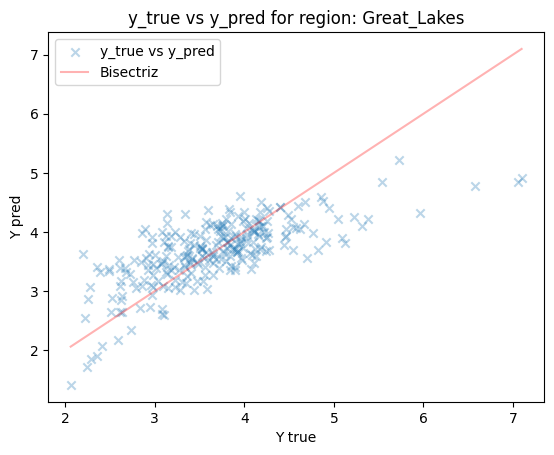

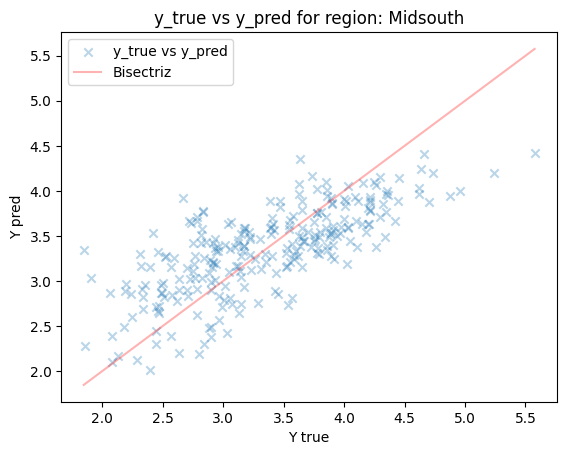

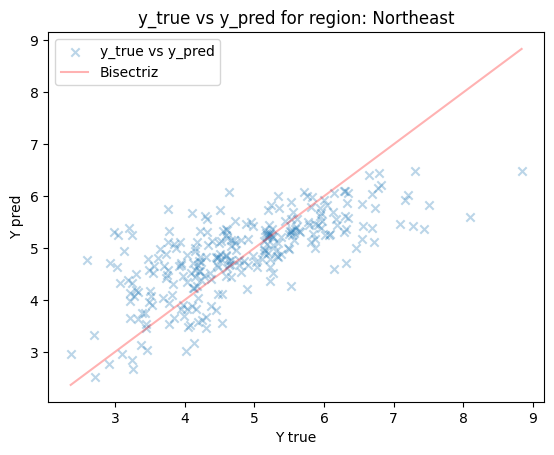

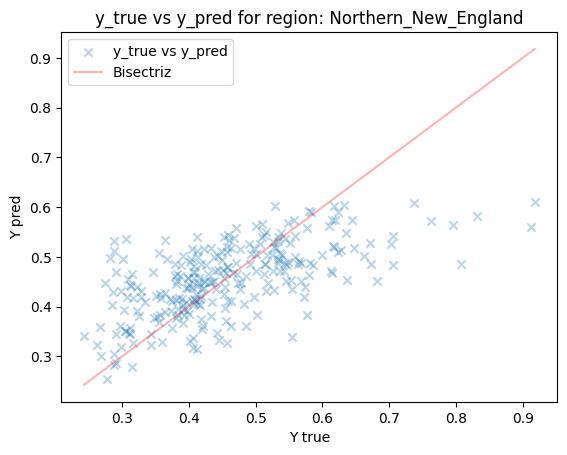

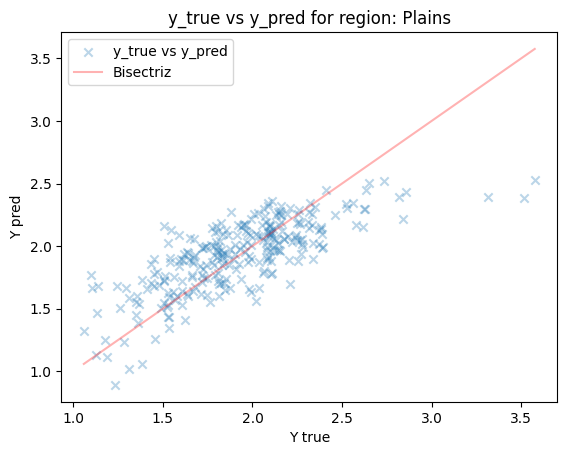

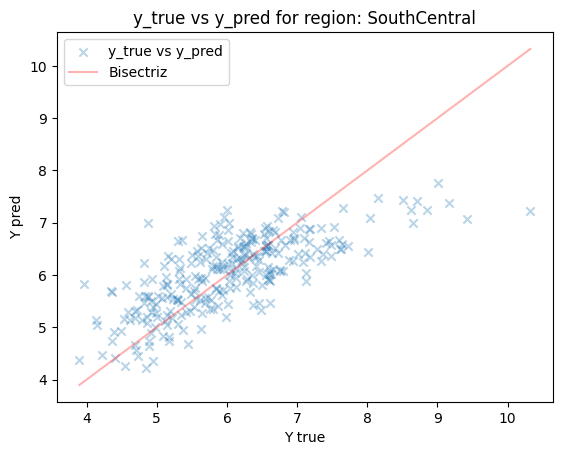

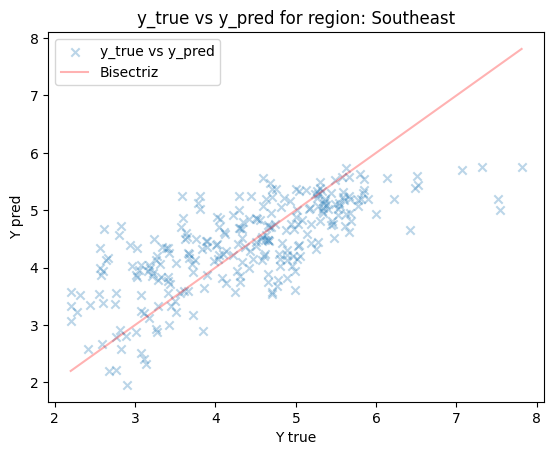

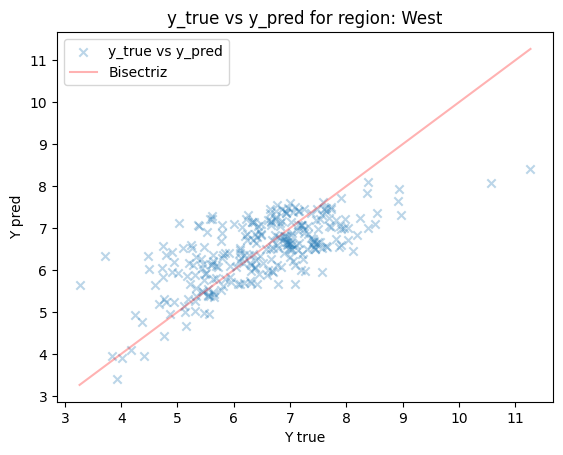

In [42]:
### TRAIN
for region_name in list_regions:
    print(region_name)
    
    # plot
    plot_y_true_vs_y_pred(df_y_true = dic_y_train[region_name],
                         df_y_pred = dic_y_train_pred[region_name],
                          title_plot = f'y_true vs y_pred for region: {region_name}'
                         )

Great_Lakes
Midsouth
Northeast
Northern_New_England
Plains
SouthCentral
Southeast
West


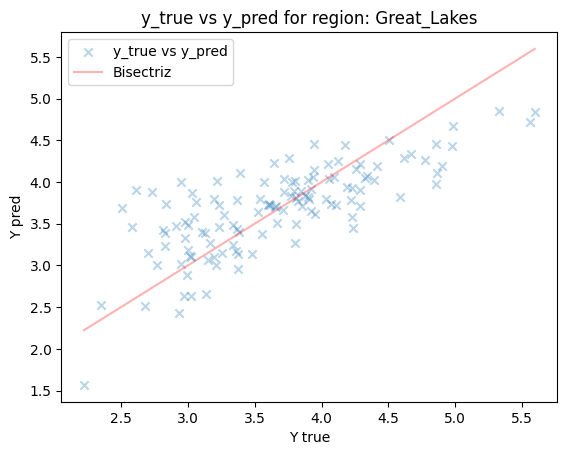

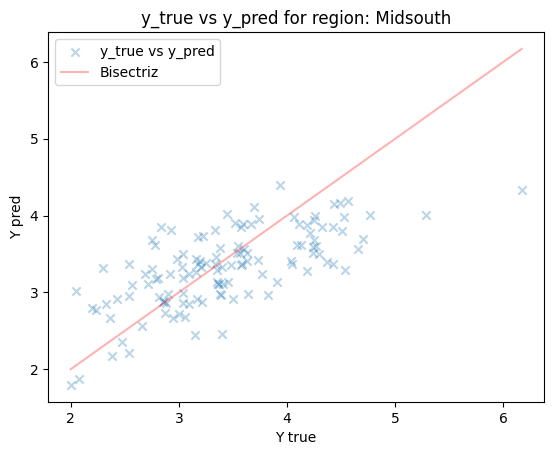

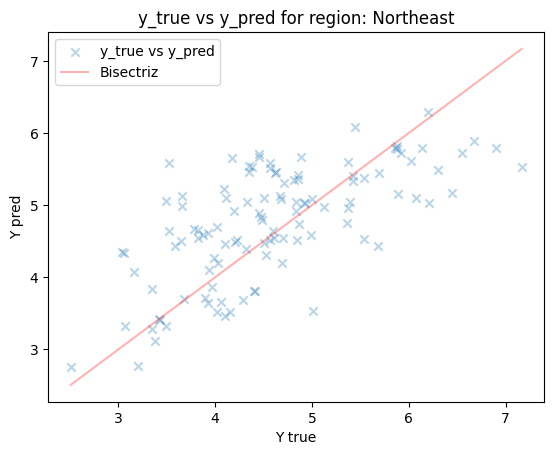

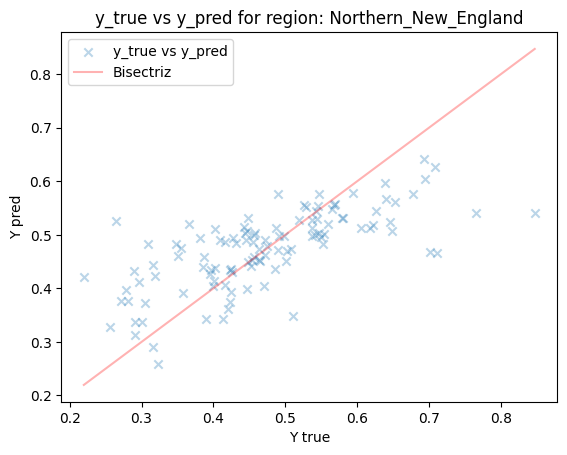

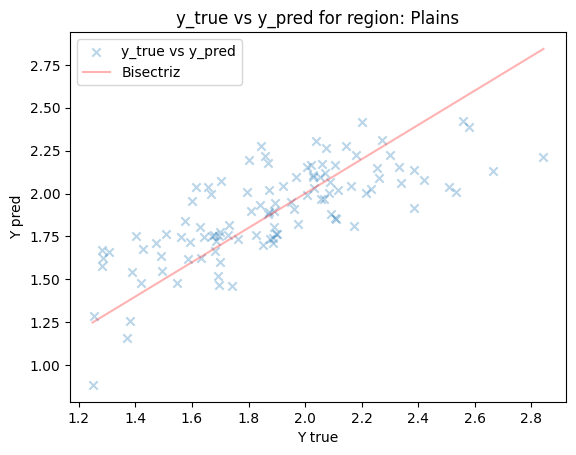

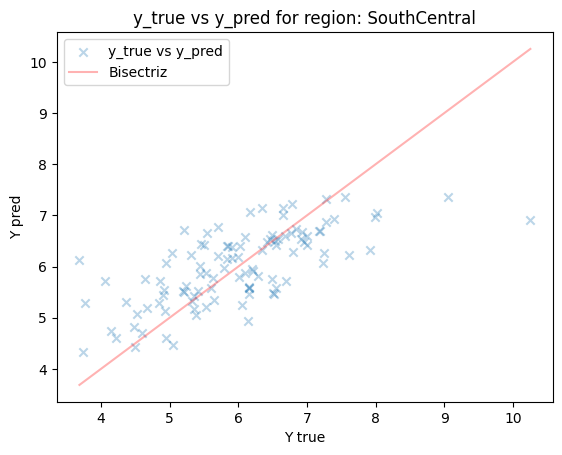

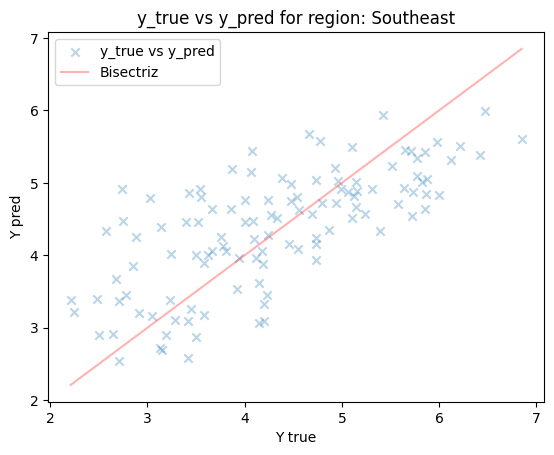

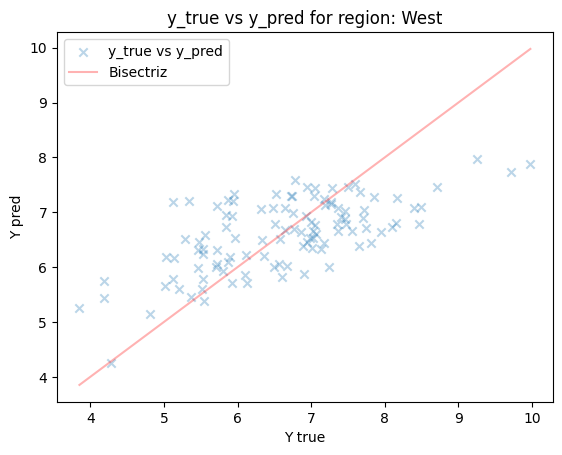

In [43]:
### TEST
for region_name in list_regions:
    print(region_name)
    
    # plot
    plot_y_true_vs_y_pred(df_y_true = dic_y_test[region_name],
                         df_y_pred = dic_y_test_pred[region_name],
                          title_plot = f'y_true vs y_pred for region: {region_name}'
                         )

#### 8.5 Evaluate y_true vs y_pred by region (one plot true vs pred - colored by region)

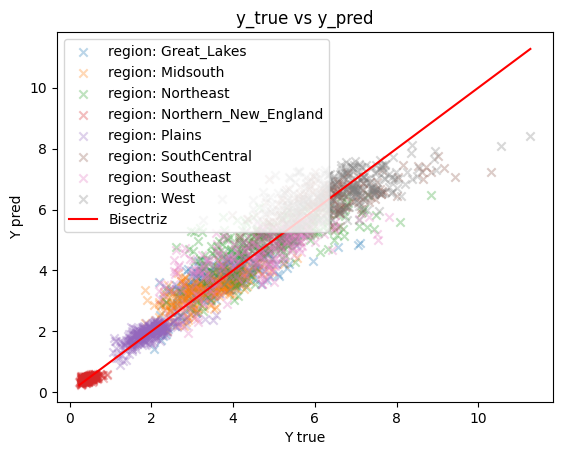

In [44]:
############# TRAIN
y = pd.DataFrame()
for region_name in list_regions:
    #print(region_name)
    # generate a data of all regions append
    y = pd.concat([y, dic_y_train[region_name]])
    
    
    # plot scatter plot for each region
    ### plot scatter plot
    fig_plot = plt.scatter(dic_y_train[region_name], 
                           dic_y_train_pred[region_name],
                          alpha = 0.3,
                          marker = 'x',
                          label = f'region: {region_name}')
    
    ### add names to axis
    plt.xlabel('Y true')
    plt.ylabel('Y pred')


### add bisectriz 
x_bisectriz = np.linspace(y.min()[0], y.max()[0], y.shape[0])
y_bisectriz = x_bisectriz  # Bisectriz: y = x
plt.plot(x_bisectriz, y_bisectriz, label='Bisectriz', color='red')

# title
plt.title('y_true vs y_pred')
plt.legend()

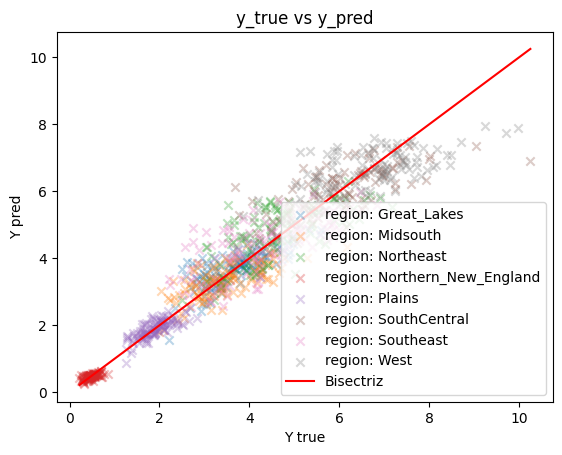

In [45]:
############# TEST
y = pd.DataFrame()
for region_name in list_regions:
    #print(region_name)
    # generate a data of all regions append
    y = pd.concat([y, dic_y_test[region_name]])
    
    
    # plot scatter plot for each region
    ### plot scatter plot
    fig_plot = plt.scatter(dic_y_test[region_name], 
                           dic_y_test_pred[region_name],
                          alpha = 0.3,
                          marker = 'x',
                          label = f'region: {region_name}')
    
    ### add names to axis
    plt.xlabel('Y true')
    plt.ylabel('Y pred')


### add bisectriz 
x_bisectriz = np.linspace(y.min()[0], y.max()[0], y.shape[0])
y_bisectriz = x_bisectriz  # Bisectriz: y = x
plt.plot(x_bisectriz, y_bisectriz, label='Bisectriz', color='red')

# title
plt.title('y_true vs y_pred')
plt.legend()

## Save model and transformations

In [46]:
import pickle

# params
path_folder_artifacts = 'artifacts/models/5_prices_regions_multiple_lr/'

In [47]:
### save all the models - save each model with its region name "model_{region}.pkl"

for region_name in list_regions:
    print(f'saving model: {region_name}')
    name_artifact_model = f'model_{region_name}.pkl'
    path_artifact_model = path_folder_artifacts + name_artifact_model
    with open(path_artifact_model, 'wb') as artifact:
        pickle.dump(dic_lr_model[region_name], artifact)

saving model: Great_Lakes
saving model: Midsouth
saving model: Northeast
saving model: Northern_New_England
saving model: Plains
saving model: SouthCentral
saving model: Southeast
saving model: West


In [48]:
dic_lr_model[region_name]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['peak']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['price_great_lakes',
                                                   'price_midsouth',
                                                   'price_northeast',
                                                   'price_northern_new_england',
                                                   'price_plains',
                                                   'price_southcentral',
                                                   'price_southeast',
                                                   'price_west'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [49]:
### example load model manually - pandas
path_model_Great_Lakes = path_folder_artifacts + 'model_Great_Lakes.pkl'
pd.read_pickle(path_model_Great_Lakes)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['peak']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['price_great_lakes',
                                                   'price_midsouth',
                                                   'price_northeast',
                                                   'price_northern_new_england',
                                                   'price_plains',
                                                   'price_southcentral',
                                                   'price_southeast',
                                                   'price_west'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [50]:
### example load model manually - pickle
path_model_Great_Lakes = path_folder_artifacts + 'model_Great_Lakes.pkl'
with open(path_model_Great_Lakes, 'rb') as artifact:
    model_uploaded = pickle.load(artifact)

In [51]:
model_uploaded

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['peak']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['price_great_lakes',
                                                   'price_midsouth',
                                                   'price_northeast',
                                                   'price_northern_new_england',
                                                   'price_plains',
                                                   'price_southcentral',
                                                   'price_southeast',
                                                   'price_west'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [52]:
X_test

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2022-05-08,Southeast,1,1.309871,1.411750,1.616570,1.496001,1.472752,1.191777,1.471889,1.472110
2015-08-09,West,0,1.120000,1.150000,1.100000,1.030000,1.140000,0.890000,1.000000,1.010000
2019-02-24,Midsouth,1,1.175716,1.078943,1.249771,1.249672,1.043883,0.805730,1.056056,1.026230
2018-11-04,Southeast,0,1.120000,1.080000,1.270000,1.320000,0.910000,0.770000,0.950000,1.010000
2017-06-11,Great_Lakes,1,1.270000,1.340000,1.680000,1.620000,1.310000,0.930000,1.330000,1.020000
...,...,...,...,...,...,...,...,...,...,...
2020-11-08,Plains,0,1.013962,1.031252,1.157698,1.059820,0.938553,0.712833,0.815630,0.922672
2020-06-21,Midsouth,1,1.221864,1.170633,1.444900,1.358187,1.007636,0.846618,1.109296,1.027121
2016-05-01,Southeast,1,0.940000,0.990000,1.120000,1.020000,0.970000,0.710000,0.750000,0.790000
